In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot
cf.go_offline
init_notebook_mode(connected=True)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
df = pd.read_csv('/Users/user/Desktop/Progress/1/Udemy - Python for Data Science and Machine Learning/19. Decision Trees and Random Forests/15-Decision-Trees-and-Random-Forests/loan_data.csv')

In [71]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [73]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [74]:
df_new = df.drop('purpose',axis=1)

In [75]:
df_new.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [76]:
df_new.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<AxesSubplot:xlabel='fico', ylabel='Count'>

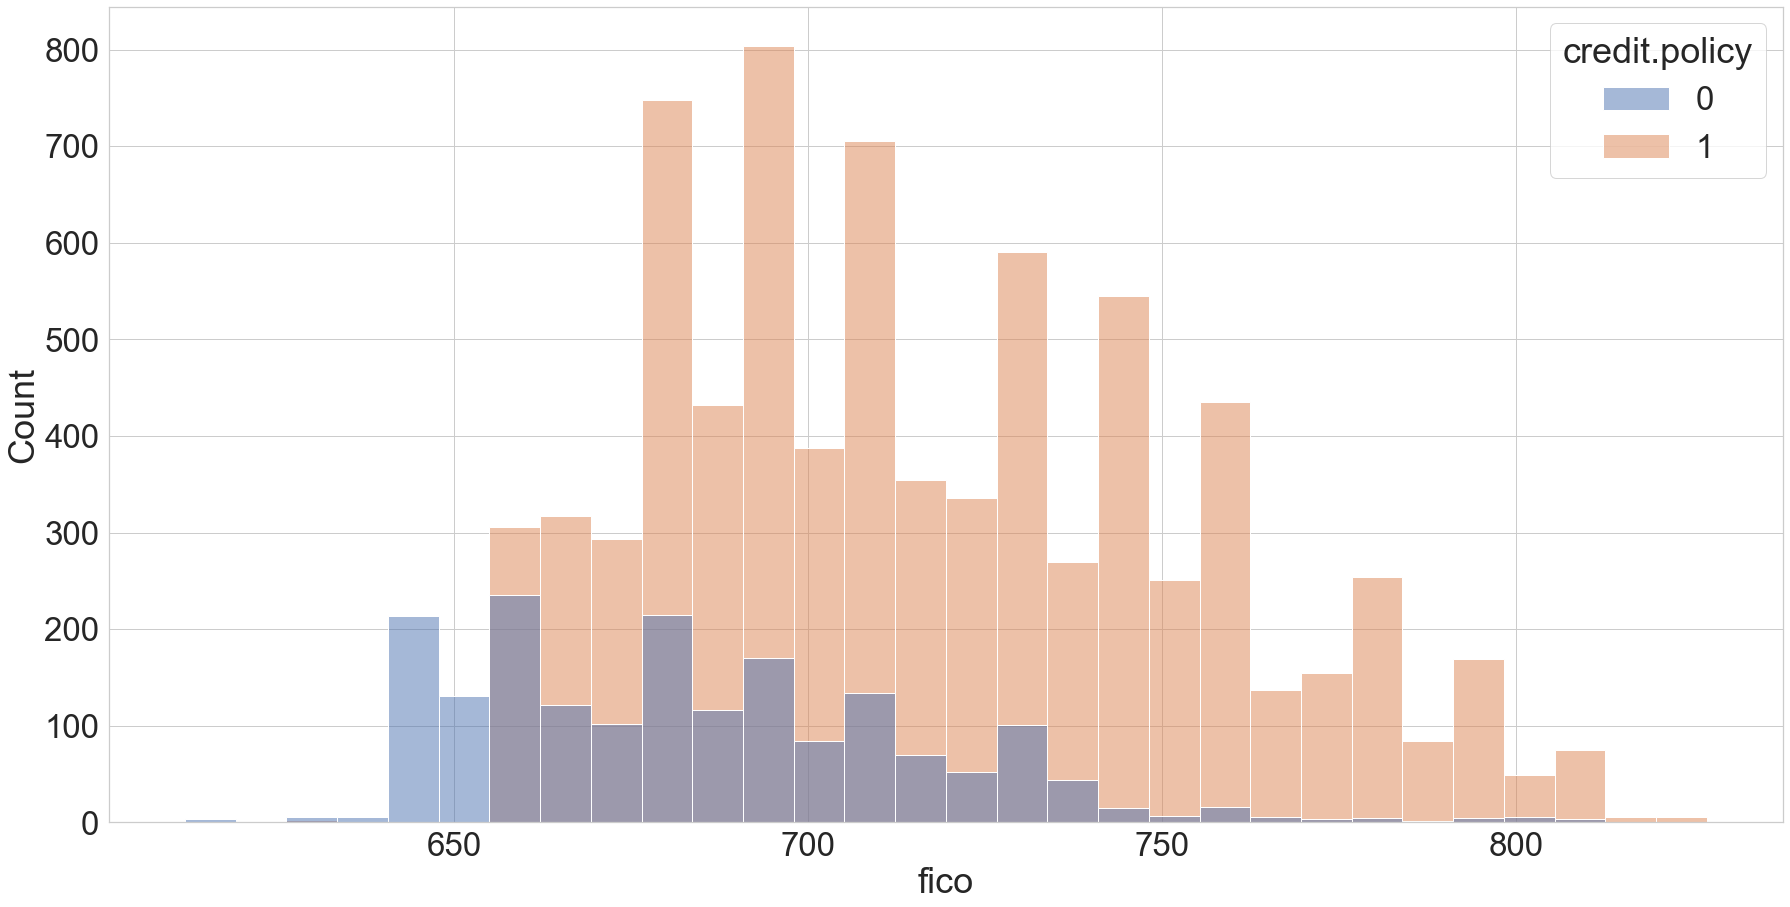

In [77]:
# fig = plt.figure(figsize = (30,15))
# axis1 = fig.add_axes([0.1,0.1,0.8,0.8])
# axis1.plot(df_new['fico'])
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
sns.set_style('whitegrid')
sns.histplot(x='fico',hue=df_new['credit.policy'],data=df_new,bins=30)

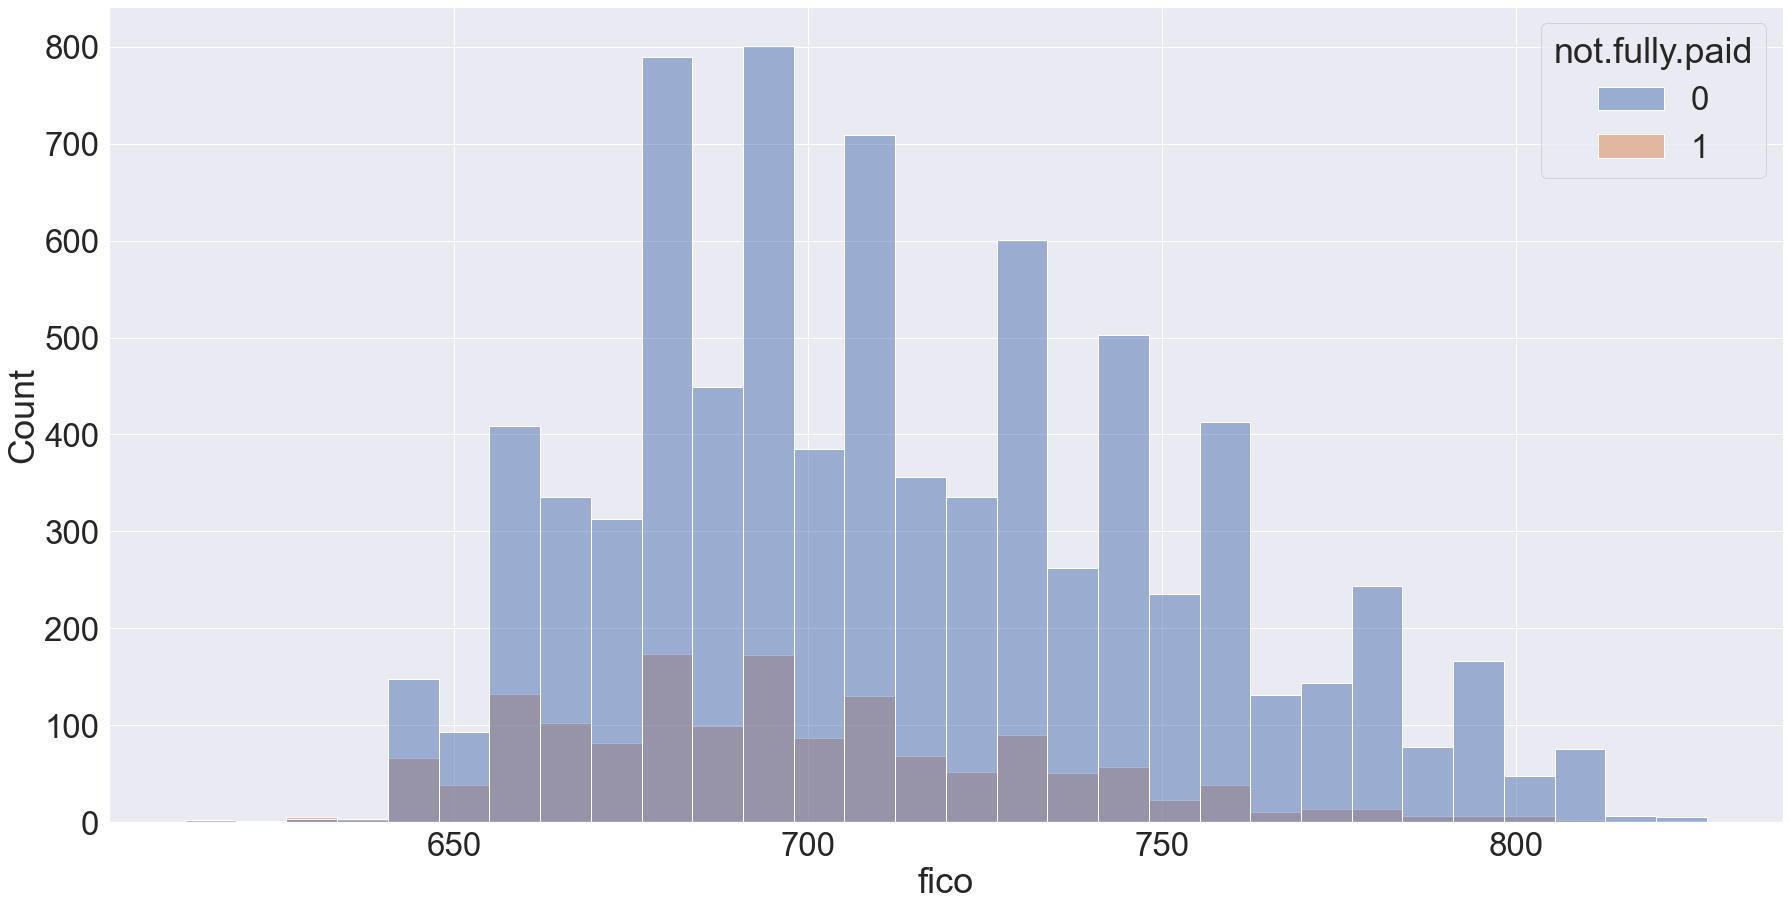

In [53]:
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
sns.histplot(x='fico',hue=df_new['not.fully.paid'],data=df_new,bins=30)
sns.set_style('whitegrid')

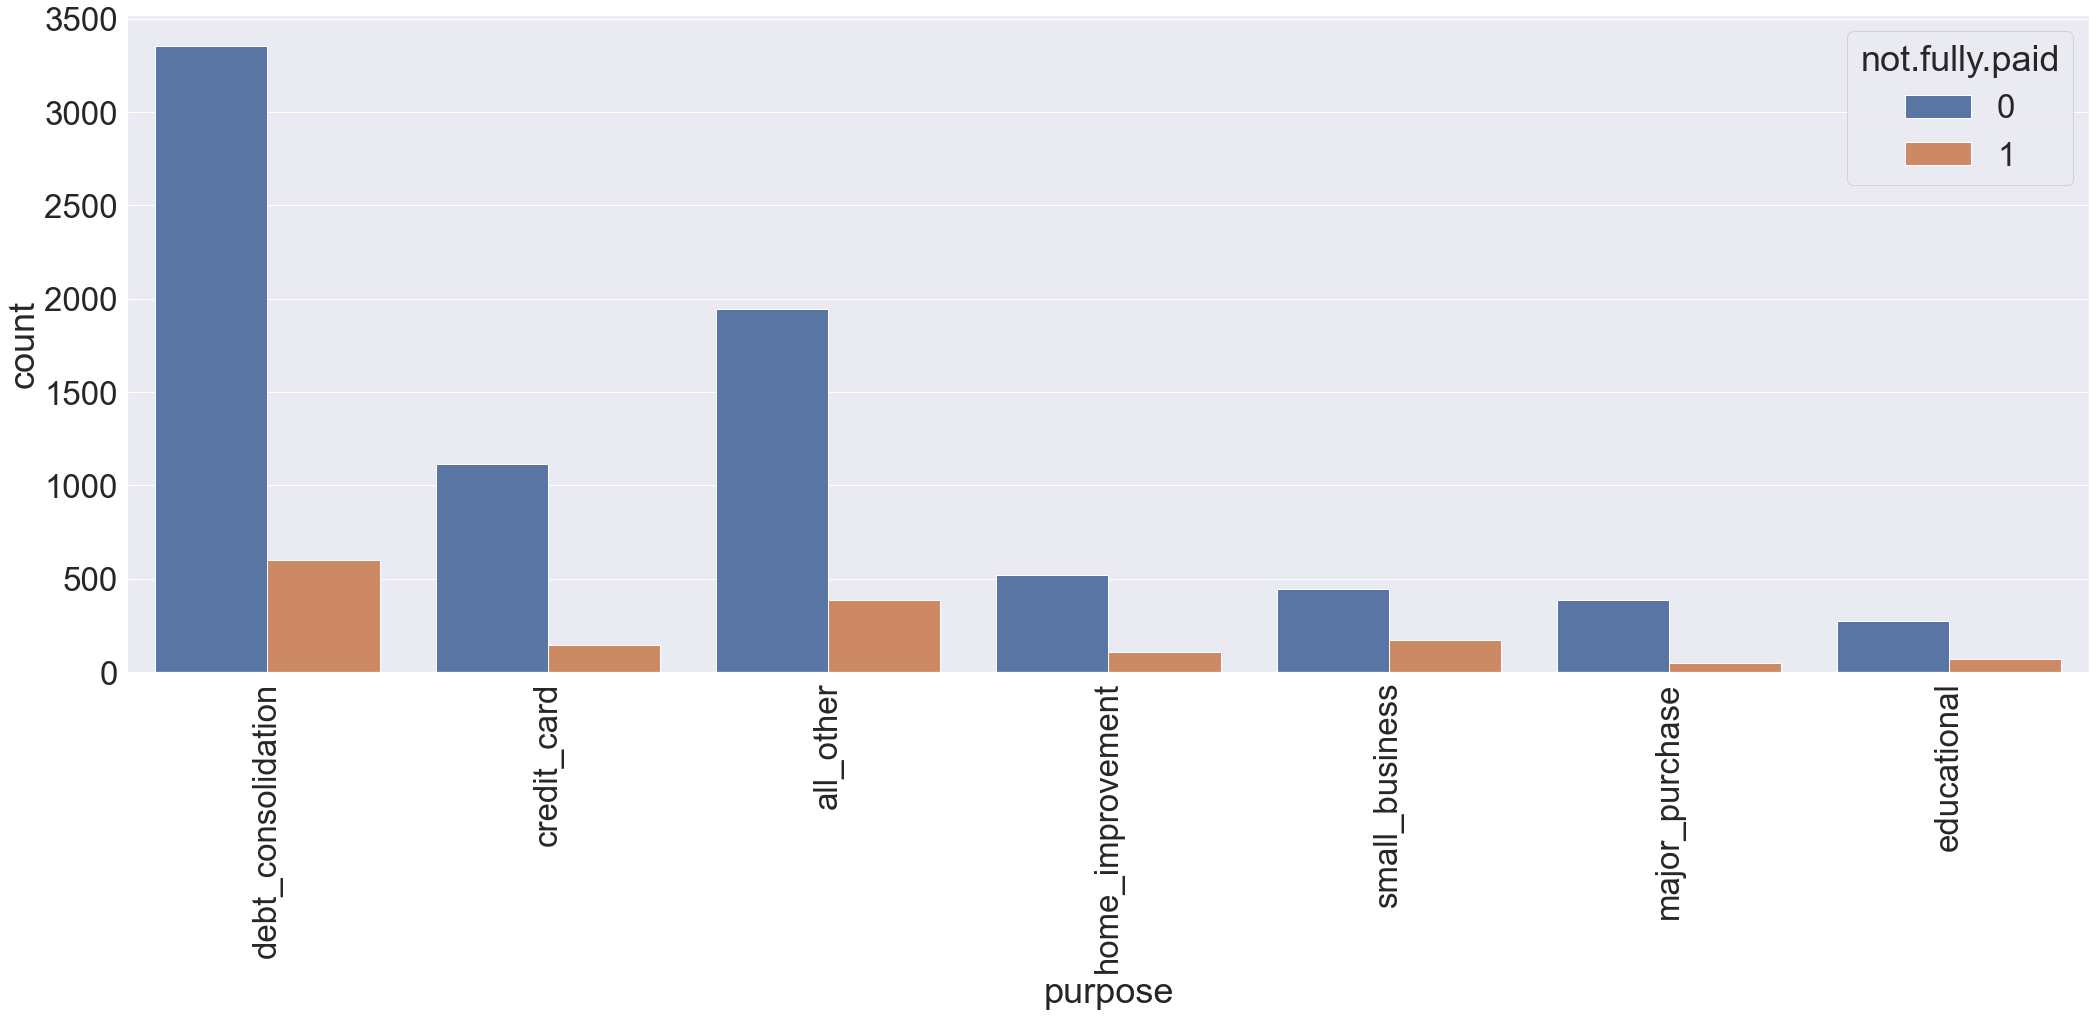

In [78]:
plt.figure(figsize=(30,15))
sns.set(font_scale=3)
sns.countplot(x=df['purpose'],hue='not.fully.paid',data=df)
plt.xticks(rotation='vertical')
plt.tight_layout()

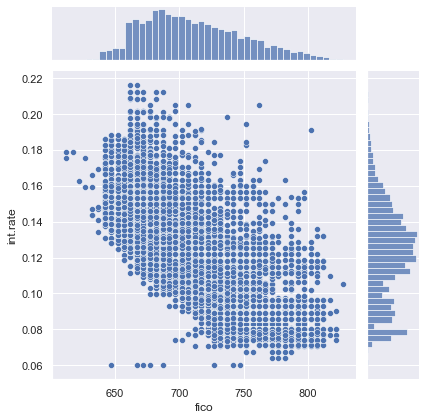

In [79]:
sns.set(font_scale=1)
sns.jointplot(data=df_new,x='fico',y='int.rate')

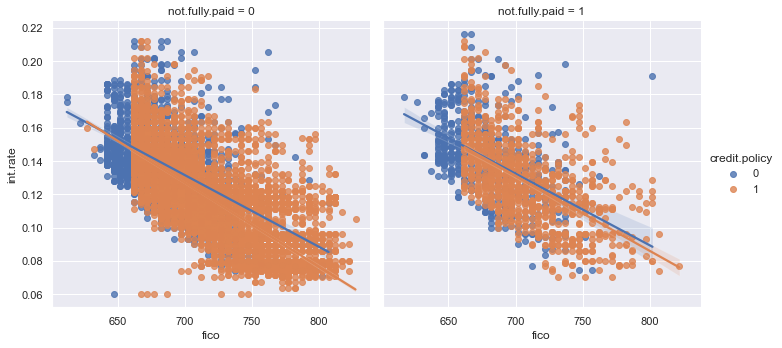

In [80]:
sns.lmplot(x='fico',y='int.rate',col='not.fully.paid',hue='credit.policy',data=df_new)

In [81]:
cat_feat = ['purpose']
df = pd.get_dummies(df,columns=cat_feat,drop_first=True)

In [82]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [83]:
x=df.drop('credit.policy',axis=1)
y = df['credit.policy']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtr = DecisionTreeClassifier()

In [86]:
lr.fit(x_train,y_train)
predicty = lr.predict(x_test)
print(classification_report(y_test,predicty))
print(round(lr.score(x_train,y_train)*100,2))

              precision    recall  f1-score   support

           0       0.80      0.46      0.59       573
           1       0.88      0.97      0.92      2301

    accuracy                           0.87      2874
   macro avg       0.84      0.72      0.75      2874
weighted avg       0.86      0.87      0.86      2874

87.25


c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [87]:
rfc.fit(x_train,y_train)
predictx = rfc.predict(x_test)
print(classification_report(y_test,predictx))
print(round(rfc.score(x_train,y_train)*100,2))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       573
           1       0.99      1.00      0.99      2301

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874

100.0


In [88]:
dtr.fit(x_train,y_train)
predictz = dtr.predict(x_test)
print(classification_report(y_test,predictz))
print(round(dtr.score(x_train,y_train)*100,2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       573
           1       0.99      0.99      0.99      2301

    accuracy                           0.99      2874
   macro avg       0.99      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874

100.0
